In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from actin_tubules_sim.prepare_datasets import create_folders, create_patches_reduced_target, RawDataScaled
from csbdeep.utils import plot_some

In [2]:
root_dir = '/Users/vkapoor/Downloads/Microtubules'
create_folders(root_dir)


/Users/vkapoor/miniconda3/envs/kapoorlabsenv/lib/python3.10/site-packages/mrcfile/mrcinterpreter.py:206: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
/Users/vkapoor/miniconda3/envs/kapoorlabsenv/lib/python3.10/site-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


In [3]:
scale_gt = 2.0
patch_size = 128
n_patches_per_image = 1

In [4]:
raw_data = RawDataScaled.from_folder (
    basepath    = f'{root_dir}/Train/SR',
    source_dirs = ['Raw'],
    target_dir  = 'GT',
    scale_gt = scale_gt,
    axes        = 'ZYX',
)

In [5]:
X, Y, XY_axes = create_patches_reduced_target (
    raw_data            = raw_data,
    patch_size          = (None,patch_size,patch_size),
    n_patches_per_image = n_patches_per_image,
    target_axes         = 'YX',
    reduction_axes      = 'Z',
    scale_gt = scale_gt,
    save_file           = f'{root_dir}/Train/SR/microtubule_sr_training_data.npz',
)

   55 raw images x    1 transformations   =    55 images
   55 images     x    1 patches per image =    55 patches in total
Input data:
/Users/vkapoor/Downloads/Microtubules/Train/SR: target='GT', sources=['Raw'], axes='ZYX', pattern='*.tif*'
Transformations:
1 x Broadcast target image to the shape of source
64 x 64
Patch size:
9 x 64 x 64


100%|██████████| 55/55 [02:38<00:00,  2.89s/it]

Saving data to /Users/vkapoor/Downloads/Microtubules/Train/SR/microtubule_sr_training_data.npz.
5 (55, 1, 9, 64, 64) 5 (55, 1, 1, 128, 128)


In [6]:
print("shape of X   =", X.shape)
print("shape of Y   =", Y.shape)
print("axes  of X,Y =", XY_axes)

shape of X   = (55, 1, 9, 64, 64)
shape of Y   = (55, 1, 1, 128, 128)
axes  of X,Y = SCZYX


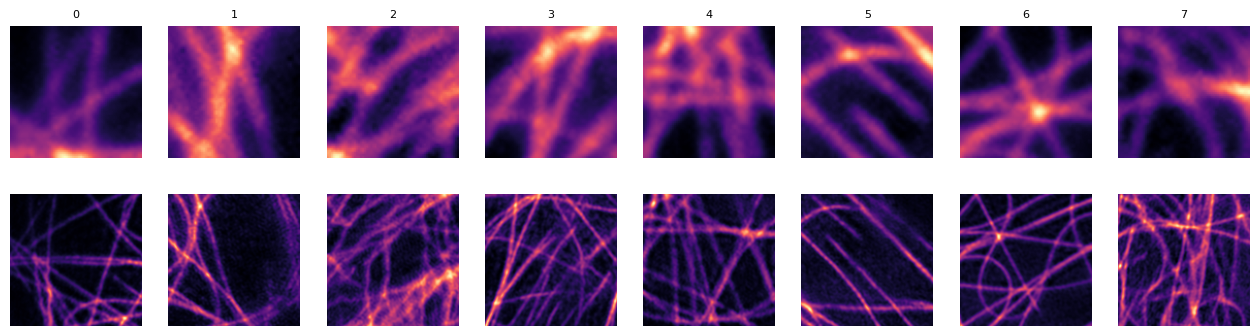

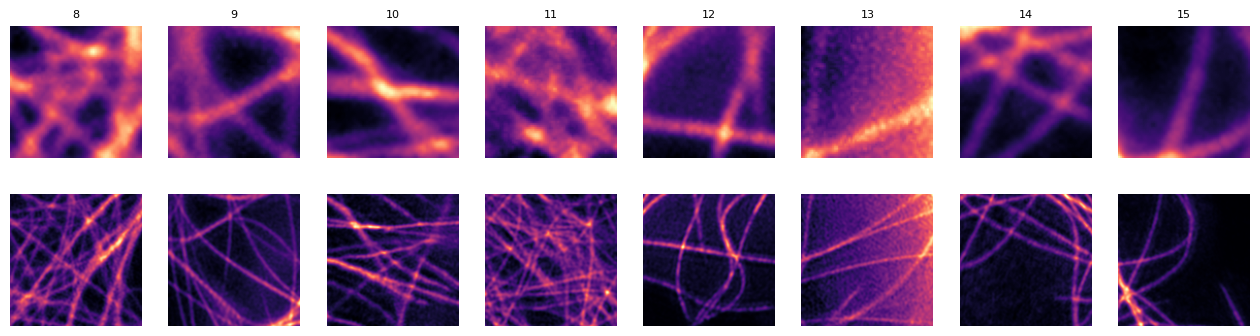

In [7]:
for i in range(2):
    plt.figure(figsize=(16,4))
    sl = slice(8*i, 8*(i+1)), 0
    plot_some(X[sl],Y[sl],title_list=[np.arange(sl[0].start,sl[0].stop)])
    plt.show()
